In [44]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_est_split

RANDOM_SEED = 42

In [45]:
dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.hdf5'

In [46]:
NUM_CLASSES = 4

In [47]:
TIME_STEPS = 16
DIMENSION = 2

In [48]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION) + 1)))

In [49]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [51]:
use_lstm = False
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

In [52]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 24)                792       
_________________________________________________________________
dropout_5 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                250       
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 44        
Total params: 1,086
Trainable params: 1,086
Non-trainable params: 0
_________________________________________________________________


In [53]:

cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)

es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [54]:

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [55]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/32 [..............................] - ETA: 0s - loss: 1.3761 - accuracy: 0.2031
Epoch 00001: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 3ms/step - loss: 1.3672 - accuracy: 0.4668 - val_loss: 1.3506 - val_accuracy: 0.5431
Epoch 2/1000
 1/32 [..............................] - ETA: 0s - loss: 1.3590 - accuracy: 0.4531
Epoch 00002: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 1.3413 - accuracy: 0.4892 - val_loss: 1.3219 - val_accuracy: 0.5801
Epoch 3/1000
 1/32 [..............................] - ETA: 0s - loss: 1.3298 - accuracy: 0.5078
Epoch 00003: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 1ms/step - loss: 1.3159 - accuracy: 0.5048 - val_loss: 1.2872 - val_accuracy: 0.5997
Epoch 4/1000
 1/32 [..............................] - E

Epoch 27/1000
 1/32 [..............................] - ETA: 0s - loss: 0.6246 - accuracy: 0.7812
Epoch 00027: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 1ms/step - loss: 0.6659 - accuracy: 0.7505 - val_loss: 0.4685 - val_accuracy: 0.9373
Epoch 28/1000
 1/32 [..............................] - ETA: 0s - loss: 0.6483 - accuracy: 0.7812
Epoch 00028: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 1ms/step - loss: 0.6585 - accuracy: 0.7570 - val_loss: 0.4572 - val_accuracy: 0.9388
Epoch 29/1000
 1/32 [..............................] - ETA: 0s - loss: 0.6241 - accuracy: 0.7422
Epoch 00029: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 1ms/step - loss: 0.6696 - accuracy: 0.7450 - val_loss: 0.4493 - val_accuracy: 0.9373
Epoch 30/1000
 1/32 [..............................]

Epoch 53/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4690 - accuracy: 0.8125
Epoch 00053: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.5255 - accuracy: 0.8051 - val_loss: 0.2901 - val_accuracy: 0.9569
Epoch 54/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4840 - accuracy: 0.8281
Epoch 00054: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.5203 - accuracy: 0.7998 - val_loss: 0.2859 - val_accuracy: 0.9592
Epoch 55/1000
 1/32 [..............................] - ETA: 0s - loss: 0.5000 - accuracy: 0.8281
Epoch 00055: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.5166 - accuracy: 0.8014 - val_loss: 0.2831 - val_accuracy: 0.9600
Epoch 56/1000
 1/32 [..............................]

Epoch 79/1000
 1/32 [..............................] - ETA: 0s - loss: 0.5488 - accuracy: 0.8203
Epoch 00079: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 1ms/step - loss: 0.4564 - accuracy: 0.8353 - val_loss: 0.2348 - val_accuracy: 0.9630
Epoch 80/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4565 - accuracy: 0.8125
Epoch 00080: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 1ms/step - loss: 0.4752 - accuracy: 0.8238 - val_loss: 0.2331 - val_accuracy: 0.9645
Epoch 81/1000
 1/32 [..............................] - ETA: 0s - loss: 0.5283 - accuracy: 0.8359
Epoch 00081: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4815 - accuracy: 0.8202 - val_loss: 0.2323 - val_accuracy: 0.9637
Epoch 82/1000
 1/32 [..............................]

Epoch 105/1000
 1/32 [..............................] - ETA: 0s - loss: 0.3648 - accuracy: 0.8828
Epoch 00105: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 1ms/step - loss: 0.4507 - accuracy: 0.8323 - val_loss: 0.2172 - val_accuracy: 0.9645
Epoch 106/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4418 - accuracy: 0.8516
Epoch 00106: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 1ms/step - loss: 0.4466 - accuracy: 0.8404 - val_loss: 0.2137 - val_accuracy: 0.9630
Epoch 107/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4578 - accuracy: 0.8359
Epoch 00107: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 1ms/step - loss: 0.4548 - accuracy: 0.8394 - val_loss: 0.2130 - val_accuracy: 0.9668
Epoch 108/1000
 1/32 [...........................

Epoch 131/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4567 - accuracy: 0.8359
Epoch 00131: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 1ms/step - loss: 0.4190 - accuracy: 0.8449 - val_loss: 0.1936 - val_accuracy: 0.9683
Epoch 132/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4262 - accuracy: 0.8438
Epoch 00132: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 1ms/step - loss: 0.4192 - accuracy: 0.8442 - val_loss: 0.1946 - val_accuracy: 0.9690
Epoch 133/1000
 1/32 [..............................] - ETA: 0s - loss: 0.5185 - accuracy: 0.8438
Epoch 00133: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 1ms/step - loss: 0.4397 - accuracy: 0.8379 - val_loss: 0.1949 - val_accuracy: 0.9683
Epoch 134/1000
 1/32 [...........................

Epoch 157/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4044 - accuracy: 0.8516
Epoch 00157: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 1ms/step - loss: 0.4237 - accuracy: 0.8414 - val_loss: 0.1878 - val_accuracy: 0.9668
Epoch 158/1000
 1/32 [..............................] - ETA: 0s - loss: 0.3085 - accuracy: 0.9141
Epoch 00158: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 2ms/step - loss: 0.4216 - accuracy: 0.8560 - val_loss: 0.1868 - val_accuracy: 0.9683
Epoch 159/1000
 1/32 [..............................] - ETA: 0s - loss: 0.6993 - accuracy: 0.8281
Epoch 00159: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 1ms/step - loss: 0.4228 - accuracy: 0.8537 - val_loss: 0.1883 - val_accuracy: 0.9660
Epoch 160/1000
 1/32 [...........................

Epoch 183/1000
 1/32 [..............................] - ETA: 0s - loss: 0.3723 - accuracy: 0.8594
Epoch 00183: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 1ms/step - loss: 0.3960 - accuracy: 0.8630 - val_loss: 0.1838 - val_accuracy: 0.9683
Epoch 184/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4224 - accuracy: 0.8281
Epoch 00184: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 1ms/step - loss: 0.4170 - accuracy: 0.8467 - val_loss: 0.1830 - val_accuracy: 0.9668
Epoch 185/1000
 1/32 [..............................] - ETA: 0s - loss: 0.3567 - accuracy: 0.8750
Epoch 00185: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 1ms/step - loss: 0.4012 - accuracy: 0.8515 - val_loss: 0.1821 - val_accuracy: 0.9653
Epoch 186/1000
 1/32 [...........................

Epoch 209/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4155 - accuracy: 0.8359
Epoch 00209: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 1ms/step - loss: 0.3846 - accuracy: 0.8570 - val_loss: 0.1759 - val_accuracy: 0.9668
Epoch 210/1000
 1/32 [..............................] - ETA: 0s - loss: 0.3903 - accuracy: 0.8828
Epoch 00210: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 1ms/step - loss: 0.3992 - accuracy: 0.8583 - val_loss: 0.1764 - val_accuracy: 0.9660
Epoch 211/1000
 1/32 [..............................] - ETA: 0s - loss: 0.3561 - accuracy: 0.8359
Epoch 00211: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 1ms/step - loss: 0.4149 - accuracy: 0.8502 - val_loss: 0.1766 - val_accuracy: 0.9668
Epoch 212/1000
 1/32 [...........................

Epoch 235/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4046 - accuracy: 0.8906
Epoch 00235: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 1ms/step - loss: 0.4065 - accuracy: 0.8535 - val_loss: 0.1735 - val_accuracy: 0.9660
Epoch 236/1000
 1/32 [..............................] - ETA: 0s - loss: 0.3412 - accuracy: 0.8516
Epoch 00236: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 1ms/step - loss: 0.3702 - accuracy: 0.8640 - val_loss: 0.1727 - val_accuracy: 0.9645
Epoch 237/1000
 1/32 [..............................] - ETA: 0s - loss: 0.4299 - accuracy: 0.8828
Epoch 00237: saving model to model/point_history_classifier\point_history_classifier.hdf5
32/32 [==============================] - 0s 1ms/step - loss: 0.3930 - accuracy: 0.8593 - val_loss: 0.1748 - val_accuracy: 0.9675
Epoch 238/1000
 1/32 [...........................

In [56]:
model = tf.keras.models.load_model(model_save_path)

In [57]:
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[0.94607836 0.01618711 0.01409929 0.02363527]
0


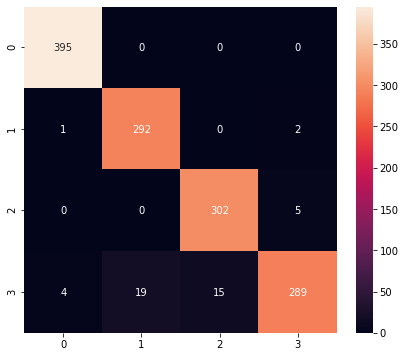

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       395
           1       0.94      0.99      0.96       295
           2       0.95      0.98      0.97       307
           3       0.98      0.88      0.93       327

    accuracy                           0.97      1324
   macro avg       0.96      0.96      0.96      1324
weighted avg       0.97      0.97      0.96      1324



In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

In [59]:

model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [60]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [61]:

converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\ASHRIT~1\AppData\Local\Temp\tmppt1wz_60\assets


INFO:tensorflow:Assets written to: C:\Users\ASHRIT~1\AppData\Local\Temp\tmppt1wz_60\assets


6176

In [62]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [63]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'input_3', 'index': 0, 'shape': array([ 1, 32]), 'shape_signature': array([-1, 32]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [64]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [65]:
%%time

interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [66]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.94607836 0.0161871  0.01409929 0.02363526]
0
